In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq torch==2.0.1 --progress-bar off
!pip install -qqq transformers==4.31.0 --progress-bar off
!pip install -qqq langchain==0.0.266 --progress-bar off
!pip install -qqq chromadb==0.4.5 --progress-bar off
!pip install -qqq pypdf==3.15.0 --progress-bar off
!pip install -qqq xformers==0.0.20 --progress-bar off
!pip install -qqq sentence_transformers==2.2.2 --progress-bar off
!pip install -qqq InstructorEmbedding==1.0.1 --progress-bar off
!pip install -qqq pdf2image==1.16.3 --progress-bar off

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.3.0+cu121 requires torch==2.3.0, but you have torch 2.0.1 which is incompatible.
torchtext 0.18.0 requires torch>=2.3.0, but you have torch 2.0.1 which is incompatible.
torchvision 0.18.0+cu121 requires torch==2.3.0, but you have torch 2.0.1 which is incompatible.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xformers 0.0.20 re

In [4]:
!pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu118/

Looking in indexes: https://pypi.org/simple, https://huggingface.github.io/autogptq-index/whl/cu118/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstallin

In [5]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 1s (212 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 121913 

In [6]:
import torch
from auto_gptq import AutoGPTQForCausalLM
from langchain import HuggingFacePipeline, PromptTemplate
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.embeddings import HuggingFaceInstructEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from pdf2image import convert_from_path
from transformers import AutoTokenizer, TextStreamer, pipeline

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

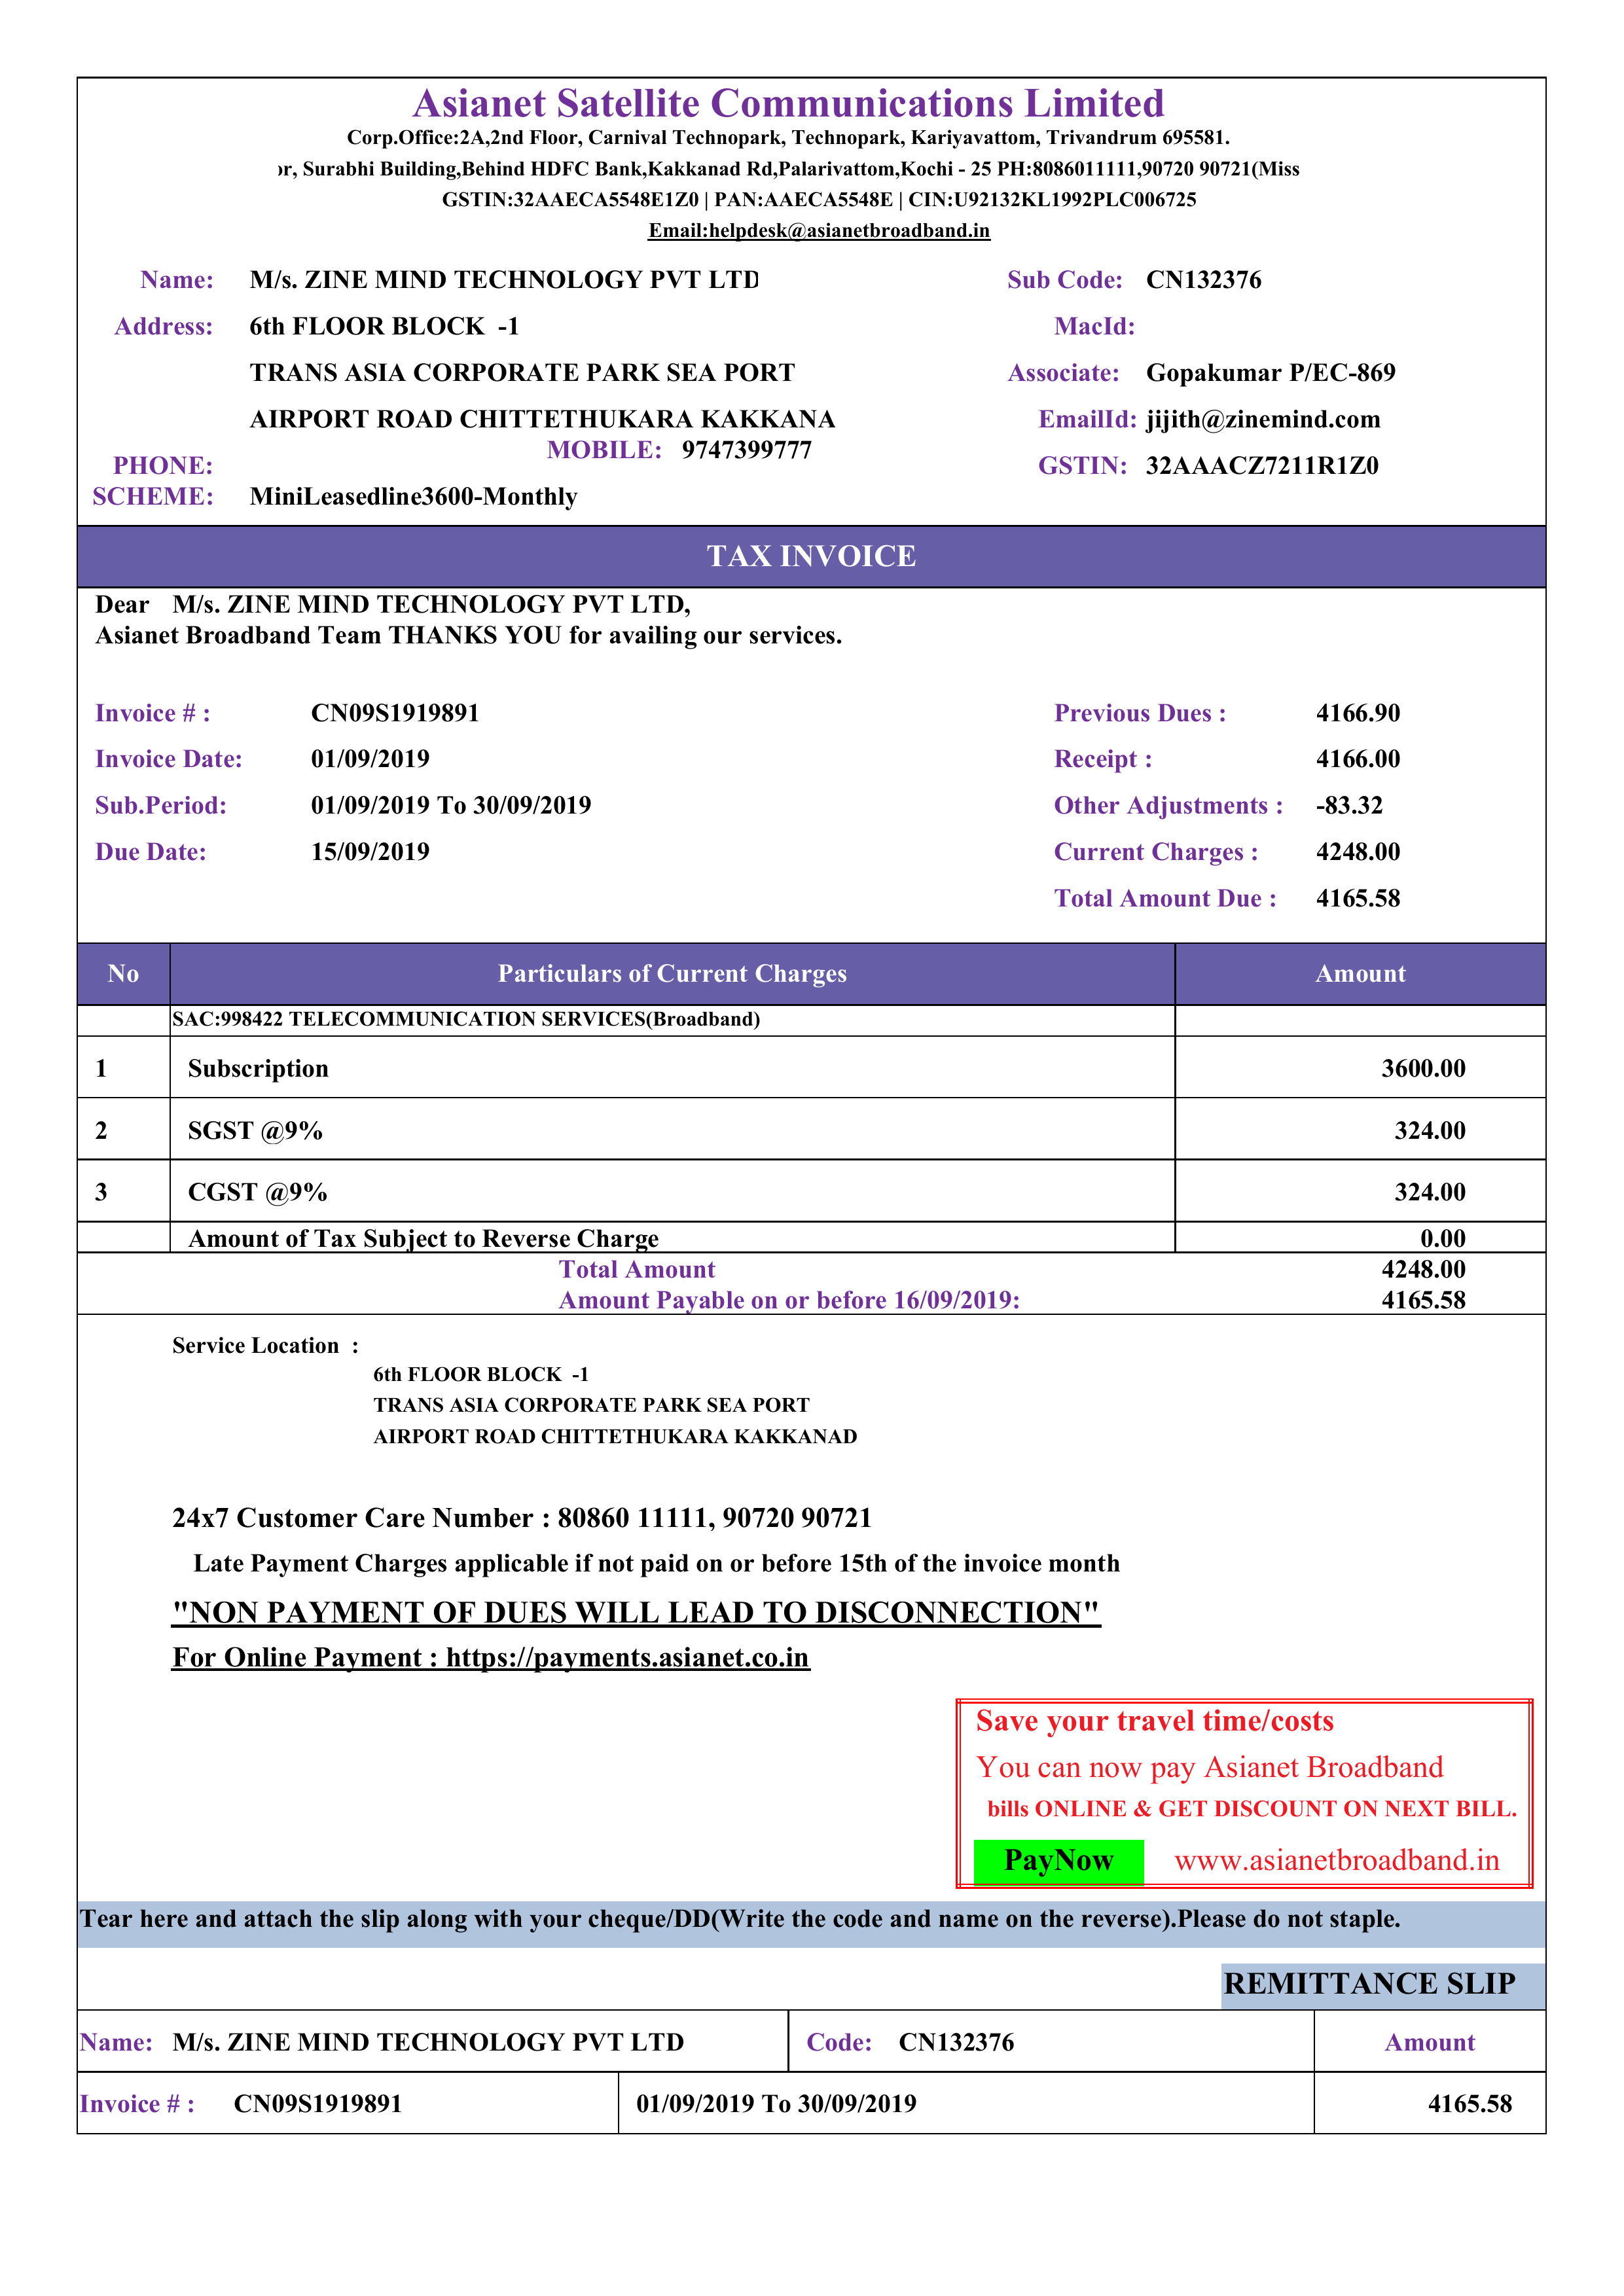

In [7]:
invoice = convert_from_path("/content/drive/MyDrive/folder/CN132376-CN09S1919891.pdf", dpi=300)
invoice[0]

In [8]:
loader = PyPDFDirectoryLoader("/content/drive/MyDrive/folder")
docs = loader.load()
len(docs)

/usr/local/lib/python3.10/dist-packages/pypdf/_cmap.py:157: PdfReadWarning: Advanced encoding /StandardEncoding not implemented yet
  warnings.warn(


7

In [9]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 58.9 MB/s eta 0:00:00


In [10]:
import fitz  # PyMuPDF
from langchain.text_splitter import CharacterTextSplitter

In [11]:
# Step 1: Extract text from the PDF
pdf_filename = '/content/drive/MyDrive/folder/CN132376-CN09S1919891.pdf'
text_content = ''

with fitz.open(pdf_filename) as pdf_document:
    for page_num in range(len(pdf_document)):
        page = pdf_document[page_num]
        text_content += page.get_text()

# Step 2: Split the text into chunks
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_text(text_content)

In [12]:
# Define a Document class with required attributes
class Document:
    def __init__(self, page_content, metadata=None):
        self.page_content = page_content
        self.metadata = metadata if metadata is not None else {}

embeddings = HuggingFaceInstructEmbeddings(
    model_name="hkunlp/instructor-large", model_kwargs={"device": DEVICE}
)

# Prepare documents as expected by Chroma.from_documents
documents = [Document(page_content=text) for text in texts]

# Use Chroma.from_documents to process the documents with embeddings
db = Chroma.from_documents(documents, embeddings)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.41k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

load INSTRUCTOR_Transformer
max_seq_length  512


In [13]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GPTQ"
model_basename = "model"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

model = AutoGPTQForCausalLM.from_quantized(
    model_name_or_path,
    revision="gptq-4bit-128g-actorder_True",
    model_basename=model_basename,
    use_safetensors=True,
    trust_remote_code=True,
    inject_fused_attention=False,
    device=DEVICE,
    quantize_config=None,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/837 [00:00<?, ?B/s]

WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.


config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

quantize_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/7.26G [00:00<?, ?B/s]

INFO - The layer lm_head is not quantized.
INFO:auto_gptq.modeling._base:The layer lm_head is not quantized.


In [30]:
DEFAULT_SYSTEM_PROMPT = """
You are a helpful, respectful and honest assistant. Always answer as helpfully as possible, while being safe. Your answers should not include any harmful, unethical, racist, sexist, toxic, dangerous, or illegal content. Please ensure that your responses are socially unbiased and positive in nature.

If a question does not make any sense, or is not factually coherent, explain why instead of answering something not correct. If you don't know the answer to a question, please don't share false information.
""".strip()


def generate_prompt(prompt: str, system_prompt: str = DEFAULT_SYSTEM_PROMPT) -> str:
    return f"""
[INST] <>
{system_prompt}
<>

{prompt} [/INST]
""".strip()

In [31]:
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

In [32]:
text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=1024,
    temperature=0,
    top_p=0.95,
    repetition_penalty=1.15,
    streamer=streamer,
)

The model 'LlamaGPTQForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MusicgenForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCausalLM', 'PLBartForCausalLM', 'ProphetNetForCausalLM', 'QDQBertLMHeadModel', 'ReformerModelWithLMHead', 'RemBertForCausal

In [33]:
llm = HuggingFacePipeline(pipeline=text_pipeline, model_kwargs={"temperature": 0})

In [34]:
SYSTEM_PROMPT = "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer."

template = generate_prompt(
    """
{context}

Question: {question}
""",
    system_prompt=SYSTEM_PROMPT,
)

In [35]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

In [36]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

In [37]:
result = qa_chain("Invoice Number:")

 Based on the provided information, the Invoice Number is:

CN09S1919891


In [38]:
result = qa_chain("please retrieve invoice date, and invoice number. im not interested in description, just give me these two values")

 Sure! Based on the provided document, I can help you retrieve the invoice date and invoice number.

Invoice Date: 01/09/2019

Invoice Number: CN09S1919891


In [39]:
result = qa_chain("please retrieve Vendor GSTIN, and Customer GSTIN . im not interested in description, just give me these two values")

 Sure! Based on the provided document, I can help you retrieve the vendor GSTIN and customer GSTIN. Here are the relevant details:

Vendor GSTIN: 32AAACZ7211R1Z0
Customer GSTIN: 32AAECA5548E1Z0

Please note that these GSTINs are only valid for the specific invoice number mentioned in the document (CN09S1919891).


In [40]:
query = "please retrieve Vendor GSTIN ,Customer GSTIN, invoice number, invoice date, vendor name, customer name,description of the invoice, vendor PAN, customer PAN, CGST, IGST, SGST, total amount, and total amount due. Display only these values without any additional information. If any value is not present, display 'none'."
result = qa_chain(query)

 Sure! Based on the provided document, here are the requested values:

Vendor GSTIN: 32AAACZ7211R1Z0
Customer GSTIN: none
Invoice number: CN09S1919891
Invoice date: 01/09/2019
Vendor name: M/s. ZINE MIND TECHNOLOGY PVT LTD
Customer name: M/s. ZINE MIND TECHNOLOGY PVT LTD
Description of the invoice: TAX INVOICE
Vendor PAN: AAECA5548E
Customer PAN: AAECA5548E
CGST: 324.00
IGST: none
SGST: 324.00
Total amount: 4248.00
Total amount due: 4165.58


In [64]:
import pandas as pd

# Extracting attributes from result
attributes = {
    'invoice_number': 'none',
    'invoice_date': 'none',
    'vendor_gstin': 'none',
    'customer_gstin': 'none',
    'customer_name': 'none',
    'vendor_name': 'none',
    'description': 'none',
    'vendor_pan': 'none',
    'customer_pan': 'none',
    'cgst': 'none',
    'igst': 'none',
    'sgst': 'none',
    'total_amount': 'none',
    'total_amount_due': 'none'
}

# Map keywords to attribute names
keywords = {
    'Vendor GSTIN': 'vendor_gstin',
    'Customer GSTIN': 'customer_gstin',
    'Invoice number': 'invoice_number',
    'Invoice date': 'invoice_date',
    'Vendor name': 'vendor_name',
    'Customer name': 'customer_name',
    'Description of the invoice': 'description',
    'Vendor PAN': 'vendor_pan',
    'Customer PAN': 'customer_pan',
    'CGST': 'cgst',
    'IGST': 'igst',
    'SGST': 'sgst',
    'Total amount': 'total_amount',
    'Total amount due': 'total_amount_due'
}

# Extract relevant information from result
if 'result' in result:
    lines = result['result'].split('\n')
    for line in lines:
        line = line.strip('* ').strip()
        for keyword, attr in keywords.items():
            if line.startswith(keyword):
                attributes[attr] = line.split(': ')[1].strip() if ': ' in line else 'none'

# Prepare data for Excel
data = {
    "Invoice Number": [attributes['invoice_number']],
    "Invoice Date": [attributes['invoice_date']],
    "Vendor GSTIN": [attributes['vendor_gstin']],
    "Customer GSTIN": [attributes['customer_gstin']],
    "Customer Name": [attributes['customer_name']],
    "Vendor Name": [attributes['vendor_name']],
    "Description": [attributes['description']],
    "Vendor PAN": [attributes['vendor_pan']],
    "Customer PAN": [attributes['customer_pan']],
    "CGST": [attributes['cgst']],
    "IGST": [attributes['igst']],
    "SGST": [attributes['sgst']],
    "Total Amount": [attributes['total_amount']],
    "Total Amount Due": [attributes['total_amount_due']],
}

# Convert to DataFrame
df = pd.DataFrame(data)
print(df)


  Invoice Number Invoice Date     Vendor GSTIN Customer GSTIN  \
0   CN09S1919891   01/09/2019  32AAACZ7211R1Z0           none   

                       Customer Name                        Vendor Name  \
0  M/s. ZINE MIND TECHNOLOGY PVT LTD  M/s. ZINE MIND TECHNOLOGY PVT LTD   

   Description  Vendor PAN Customer PAN    CGST  IGST    SGST Total Amount  \
0  TAX INVOICE  AAECA5548E   AAECA5548E  324.00  none  324.00      4165.58   

  Total Amount Due  
0          4165.58  


In [65]:
# Export to Excel
output_file = "/content/drive/MyDrive/folder/invoice_details.xlsx"
df.to_excel(output_file, index=False)
print(f"Excel file saved: {output_file}")

Excel file saved: /content/drive/MyDrive/folder/invoice_details.xlsx
